<h2><a href="https://leetcode.com/problems/sudoku-solver">37. Sudoku Solver</a></h2><h3>Hard</h3><hr><p>Write a program to solve a Sudoku puzzle by filling the empty cells.</p>

<p>A sudoku solution must satisfy <strong>all of the following rules</strong>:</p>

<ol>
	<li>Each of the digits <code>1-9</code> must occur exactly once in each row.</li>
	<li>Each of the digits <code>1-9</code> must occur exactly once in each column.</li>
	<li>Each of the digits <code>1-9</code> must occur exactly once in each of the 9 <code>3x3</code> sub-boxes of the grid.</li>
</ol>

<p>The <code>&#39;.&#39;</code> character indicates empty cells.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Sudoku-by-L2G-20050714.svg/250px-Sudoku-by-L2G-20050714.svg.png" style="height:250px; width:250px" />
<pre>
<strong>Input:</strong> board = [[&quot;5&quot;,&quot;3&quot;,&quot;.&quot;,&quot;.&quot;,&quot;7&quot;,&quot;.&quot;,&quot;.&quot;,&quot;.&quot;,&quot;.&quot;],[&quot;6&quot;,&quot;.&quot;,&quot;.&quot;,&quot;1&quot;,&quot;9&quot;,&quot;5&quot;,&quot;.&quot;,&quot;.&quot;,&quot;.&quot;],[&quot;.&quot;,&quot;9&quot;,&quot;8&quot;,&quot;.&quot;,&quot;.&quot;,&quot;.&quot;,&quot;.&quot;,&quot;6&quot;,&quot;.&quot;],[&quot;8&quot;,&quot;.&quot;,&quot;.&quot;,&quot;.&quot;,&quot;6&quot;,&quot;.&quot;,&quot;.&quot;,&quot;.&quot;,&quot;3&quot;],[&quot;4&quot;,&quot;.&quot;,&quot;.&quot;,&quot;8&quot;,&quot;.&quot;,&quot;3&quot;,&quot;.&quot;,&quot;.&quot;,&quot;1&quot;],[&quot;7&quot;,&quot;.&quot;,&quot;.&quot;,&quot;.&quot;,&quot;2&quot;,&quot;.&quot;,&quot;.&quot;,&quot;.&quot;,&quot;6&quot;],[&quot;.&quot;,&quot;6&quot;,&quot;.&quot;,&quot;.&quot;,&quot;.&quot;,&quot;.&quot;,&quot;2&quot;,&quot;8&quot;,&quot;.&quot;],[&quot;.&quot;,&quot;.&quot;,&quot;.&quot;,&quot;4&quot;,&quot;1&quot;,&quot;9&quot;,&quot;.&quot;,&quot;.&quot;,&quot;5&quot;],[&quot;.&quot;,&quot;.&quot;,&quot;.&quot;,&quot;.&quot;,&quot;8&quot;,&quot;.&quot;,&quot;.&quot;,&quot;7&quot;,&quot;9&quot;]]
<strong>Output:</strong> [[&quot;5&quot;,&quot;3&quot;,&quot;4&quot;,&quot;6&quot;,&quot;7&quot;,&quot;8&quot;,&quot;9&quot;,&quot;1&quot;,&quot;2&quot;],[&quot;6&quot;,&quot;7&quot;,&quot;2&quot;,&quot;1&quot;,&quot;9&quot;,&quot;5&quot;,&quot;3&quot;,&quot;4&quot;,&quot;8&quot;],[&quot;1&quot;,&quot;9&quot;,&quot;8&quot;,&quot;3&quot;,&quot;4&quot;,&quot;2&quot;,&quot;5&quot;,&quot;6&quot;,&quot;7&quot;],[&quot;8&quot;,&quot;5&quot;,&quot;9&quot;,&quot;7&quot;,&quot;6&quot;,&quot;1&quot;,&quot;4&quot;,&quot;2&quot;,&quot;3&quot;],[&quot;4&quot;,&quot;2&quot;,&quot;6&quot;,&quot;8&quot;,&quot;5&quot;,&quot;3&quot;,&quot;7&quot;,&quot;9&quot;,&quot;1&quot;],[&quot;7&quot;,&quot;1&quot;,&quot;3&quot;,&quot;9&quot;,&quot;2&quot;,&quot;4&quot;,&quot;8&quot;,&quot;5&quot;,&quot;6&quot;],[&quot;9&quot;,&quot;6&quot;,&quot;1&quot;,&quot;5&quot;,&quot;3&quot;,&quot;7&quot;,&quot;2&quot;,&quot;8&quot;,&quot;4&quot;],[&quot;2&quot;,&quot;8&quot;,&quot;7&quot;,&quot;4&quot;,&quot;1&quot;,&quot;9&quot;,&quot;6&quot;,&quot;3&quot;,&quot;5&quot;],[&quot;3&quot;,&quot;4&quot;,&quot;5&quot;,&quot;2&quot;,&quot;8&quot;,&quot;6&quot;,&quot;1&quot;,&quot;7&quot;,&quot;9&quot;]]
<strong>Explanation:</strong>&nbsp;The input board is shown above and the only valid solution is shown below:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/Sudoku-by-L2G-20050714_solution.svg/250px-Sudoku-by-L2G-20050714_solution.svg.png" style="height:250px; width:250px" />
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>board.length == 9</code></li>
	<li><code>board[i].length == 9</code></li>
	<li><code>board[i][j]</code> is a digit or <code>&#39;.&#39;</code>.</li>
	<li>It is <strong>guaranteed</strong> that the input board has only one solution.</li>
</ul>


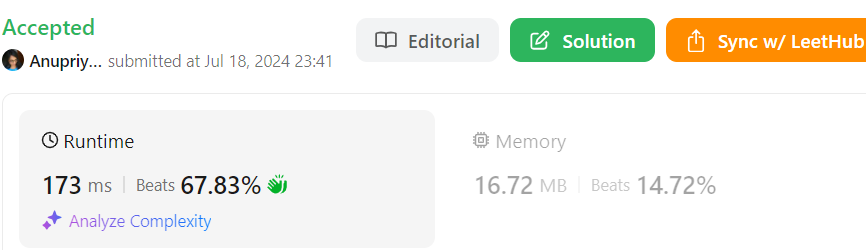

In [20]:
from collections import defaultdict
from typing import List

class Solution:
    def __init__(self):
        self.solved = False
    
    def solve(self, rowmap, colmap, gridmap, grid, numbers):
        rows, cols = len(grid), len(grid[0])

        for row in range(rows):
            for col in range(cols):
                if grid[row][col] == 0:
                    id = self.get_id(row, col)
                    for num in numbers:
                        if num not in rowmap[row] and num not in colmap[col] and num not in gridmap[int(id)]:
                            grid[row][col] = num
                            print(f"num updated : {num} at {row}, {col}")
                            rowmap[row].append(num)
                            colmap[col].append(num)
                            gridmap[id].append(num)
                            if self.solve( rowmap, colmap, gridmap, grid, numbers):
                                print(f"solved with num: {num} ")
                                
                                return True
                            else:
                                print(f"{num} didnt work in at position {row} , {col}")
                            print(f"backtracking: {num}")
                            grid[row][col] = 0
                            rowmap[row].remove(num)
                            colmap[col].remove(num)
                            gridmap[id].remove(num)
                    return False
        return True

    def solveSudoku(self, board: List[List[str]]) -> None:
        """
        Do not return anything, modify board in-place instead.
        """
        rows, cols = len(board), len(board[0])
        rowmap = defaultdict(list)
        colmap = defaultdict(list)
        gridmap = defaultdict(list)
        numbers = [1,2,3,4,5,6,7,8,9]

        
        for row in range(rows):
            for col in range(cols):
                if board[row][col] != '.':
                    num = int(board[row][col])
                    rowmap[row].append(num)
                    colmap[col].append(num)
                    id = self.get_id(row, col)
                    gridmap[id].append(num)
                    board[row][col] = num
                else:
                    board[row][col] = 0
        
        grid = board.copy()
        self.solve(rowmap, colmap, gridmap, grid, numbers)
        for row in range(rows):
            for col in range(cols):
                grid[row][col] = str(grid[row][col])
        return grid


    def get_id(self, row, col):
        r = row//3
        c = col//3
        id = 3*r + c
        return id

In [21]:
board = [["5","3",".",".","7",".",".",".","."],["6",".",".","1","9","5",".",".","."],[".","9","8",".",".",".",".","6","."],["8",".",".",".","6",".",".",".","3"],["4",".",".","8",".","3",".",".","1"],["7",".",".",".","2",".",".",".","6"],[".","6",".",".",".",".","2","8","."],[".",".",".","4","1","9",".",".","5"],[".",".",".",".","8",".",".","7","9"]]
sol = Solution()
print(sol.solveSudoku(board))

num updated : 1 at 0, 2
num updated : 2 at 0, 3
num updated : 4 at 0, 5
num updated : 8 at 0, 6
num updated : 9 at 0, 7
9 didnt work in at position 0 , 7
backtracking: 9
8 didnt work in at position 0 , 6
backtracking: 8
num updated : 9 at 0, 6
9 didnt work in at position 0 , 6
backtracking: 9
4 didnt work in at position 0 , 5
backtracking: 4
num updated : 6 at 0, 5
num updated : 4 at 0, 6
num updated : 9 at 0, 7
num updated : 8 at 0, 8
num updated : 2 at 1, 1
num updated : 4 at 1, 2
num updated : 3 at 1, 6
3 didnt work in at position 1 , 6
backtracking: 3
num updated : 7 at 1, 6
num updated : 3 at 1, 7
3 didnt work in at position 1 , 7
backtracking: 3
7 didnt work in at position 1 , 6
backtracking: 7
4 didnt work in at position 1 , 2
backtracking: 4
num updated : 7 at 1, 2
num updated : 3 at 1, 6
3 didnt work in at position 1 , 6
backtracking: 3
7 didnt work in at position 1 , 2
backtracking: 7
2 didnt work in at position 1 , 1
backtracking: 2
num updated : 4 at 1, 1
num updated : 2 at

In [6]:
# Scratch work


board = [["5","3",".",".","7",".",".",".","."],["6",".",".","1","9","5",".",".","."],[".","9","8",".",".",".",".","6","."],["8",".",".",".","6",".",".",".","3"],["4",".",".","8",".","3",".",".","1"],["7",".",".",".","2",".",".",".","6"],[".","6",".",".",".",".","2","8","."],[".",".",".","4","1","9",".",".","5"],[".",".",".",".","8",".",".","7","9"]]

def get_id( row, col):
        r = row//3
        c = col//3
        id = 3*r + c
        return id
rows, cols = len(board), len(board[0])

from collections import defaultdict


rows, cols = len(board), len(board[0])

rowmap = defaultdict(list)
colmap = defaultdict(list)
gridmap = defaultdict(list)

for row in range(rows):
    for col in range(cols):
        if board[row][col] != '.':
            rowmap[row].append(int(board[row][col]))
            colmap[col].append(int(board[row][col]))
            id  = get_id(row, col)
            gridmap[id].append(int(board[row][col]))

print(f"rowmap: {rowmap}")
print(f"colmap: {colmap}")
print(f"gridmap: {gridmap}")

rowmap: defaultdict(<class 'list'>, {0: [5, 3, 7], 1: [6, 1, 9, 5], 2: [9, 8, 6], 3: [8, 6, 3], 4: [4, 8, 3, 1], 5: [7, 2, 6], 6: [6, 2, 8], 7: [4, 1, 9, 5], 8: [8, 7, 9]})
colmap: defaultdict(<class 'list'>, {0: [5, 6, 8, 4, 7], 1: [3, 9, 6], 4: [7, 9, 6, 2, 1, 8], 3: [1, 8, 4], 5: [5, 3, 9], 2: [8], 7: [6, 8, 7], 8: [3, 1, 6, 5, 9], 6: [2]})
gridmap: defaultdict(<class 'list'>, {0: [5, 3, 6, 9, 8], 1: [7, 1, 9, 5], 2: [6], 3: [8, 4, 7], 4: [6, 8, 3, 2], 5: [3, 1, 6], 6: [6], 8: [2, 8, 5, 7, 9], 7: [4, 1, 9, 8]})


In [15]:
from collections import defaultdict
from typing import List

class Solution:
    def __init__(self):
        self.solved = False
    
    def solve(self, rowmap, colmap, gridmap, grid, numbers):
        rows, cols = len(grid), len(grid[0])

        for row in range(rows):
            for col in range(cols):
                if grid[row][col] == 0:
                    id = self.get_id(row, col)
                    for num in numbers:
                        if num not in rowmap[row] and num not in colmap[col] and num not in gridmap[int(id)]:
                            grid[row][col] = num
                            # print(f"num updated : {num}")
                            rowmap[row].append(num)
                            colmap[col].append(num)
                            gridmap[id].append(num)
                            if self.solve( rowmap, colmap, gridmap, grid, numbers):
                                return True
                            # print(f"backtracking: {num}")
                            grid[row][col] = 0
                            rowmap[row].remove(num)
                            colmap[col].remove(num)
                            gridmap[id].remove(num)
                    return False
        return True
                            
    
    def solveSudoku(self, board: List[List[str]]) -> None:
        """
        Do not return anything, modify board in-place instead.
        """
        rows, cols = len(board), len(board[0])
        rowmap = defaultdict(list)
        colmap = defaultdict(list)
        gridmap = defaultdict(list)
        numbers = [1,2,3,4,5,6,7,8,9]

        
        for row in range(rows):
            for col in range(cols):
                if board[row][col] != '.':
                    num = int(board[row][col])
                    rowmap[row].append(num)
                    colmap[col].append(num)
                    id = self.get_id(row, col)
                    gridmap[id].append(num)
                    board[row][col] = num
                else:
                    board[row][col] = 0
        
        grid = board.copy()
        self.solve(rowmap, colmap, gridmap, grid, numbers)
        for row in range(rows):
            for col in range(cols):
                grid[row][col] = str(grid[row][col])
        
        return grid


    def get_id(self, row, col):
        r = row//3
        c = col//3
        id = 3*r + c
        return id

In [16]:
board = [["5","3",".",".","7",".",".",".","."],["6",".",".","1","9","5",".",".","."],[".","9","8",".",".",".",".","6","."],["8",".",".",".","6",".",".",".","3"],["4",".",".","8",".","3",".",".","1"],["7",".",".",".","2",".",".",".","6"],[".","6",".",".",".",".","2","8","."],[".",".",".","4","1","9",".",".","5"],[".",".",".",".","8",".",".","7","9"]]
sol = Solution()
print(sol.solveSudoku(board))

[['5', '3', '4', '6', '7', '8', '9', '1', '2'], ['6', '7', '2', '1', '9', '5', '3', '4', '8'], ['1', '9', '8', '3', '4', '2', '5', '6', '7'], ['8', '5', '9', '7', '6', '1', '4', '2', '3'], ['4', '2', '6', '8', '5', '3', '7', '9', '1'], ['7', '1', '3', '9', '2', '4', '8', '5', '6'], ['9', '6', '1', '5', '3', '7', '2', '8', '4'], ['2', '8', '7', '4', '1', '9', '6', '3', '5'], ['3', '4', '5', '2', '8', '6', '1', '7', '9']]
